In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker

from mpl_toolkits.basemap import Basemap

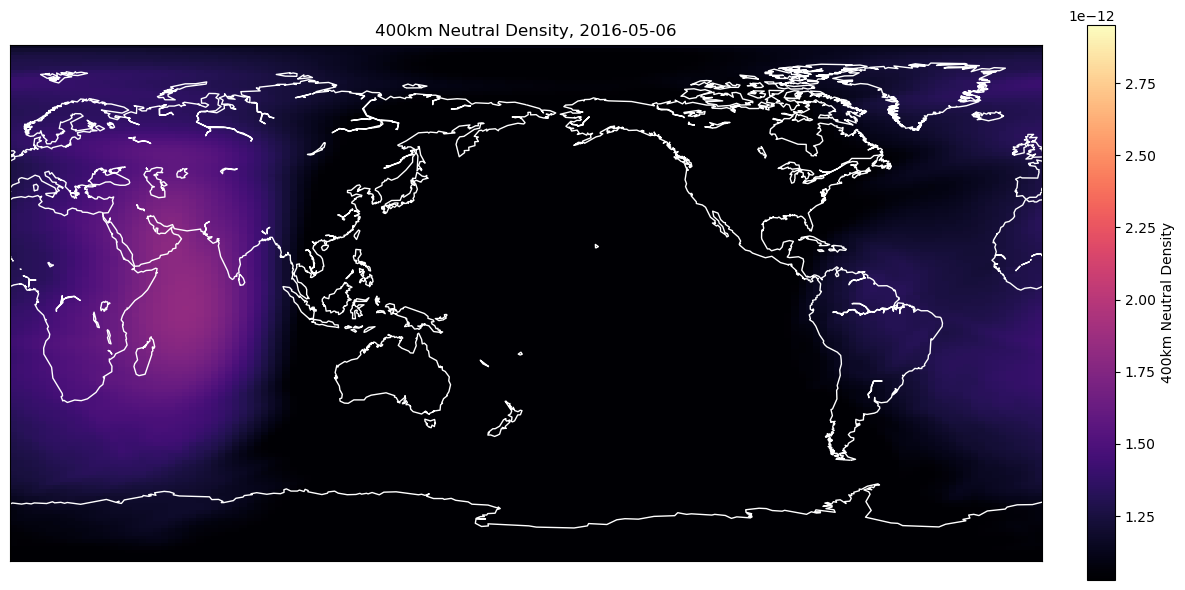

In [8]:
loaded_arrays = np.load('simulation_outputs/20160506_rho_400km_artemis.npz')

x = loaded_arrays['glon'][:,0]
y = loaded_arrays['glat'][0]
z = loaded_arrays['rho']

num_frames = z.shape[0]

fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360,resolution='c', ax=ax)
m.drawcoastlines(color='white')


c = ax.pcolormesh(x, y, z[0].T, shading='auto', cmap='magma')

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('400km Neutral Density')


def init():
    c.set_array(z[0].T.ravel())
    return c,

def update(frame):
    # Updating the array data for pcolormesh
    c.set_array(z[frame].T.ravel())
    return c,

plt.title('400km Neutral Density, 2016-05-06')
anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
anim.save('overlap_plots/artemis_400km_neutral.mp4', writer='ffmpeg', fps=10)
plt.tight_layout()
plt.show()

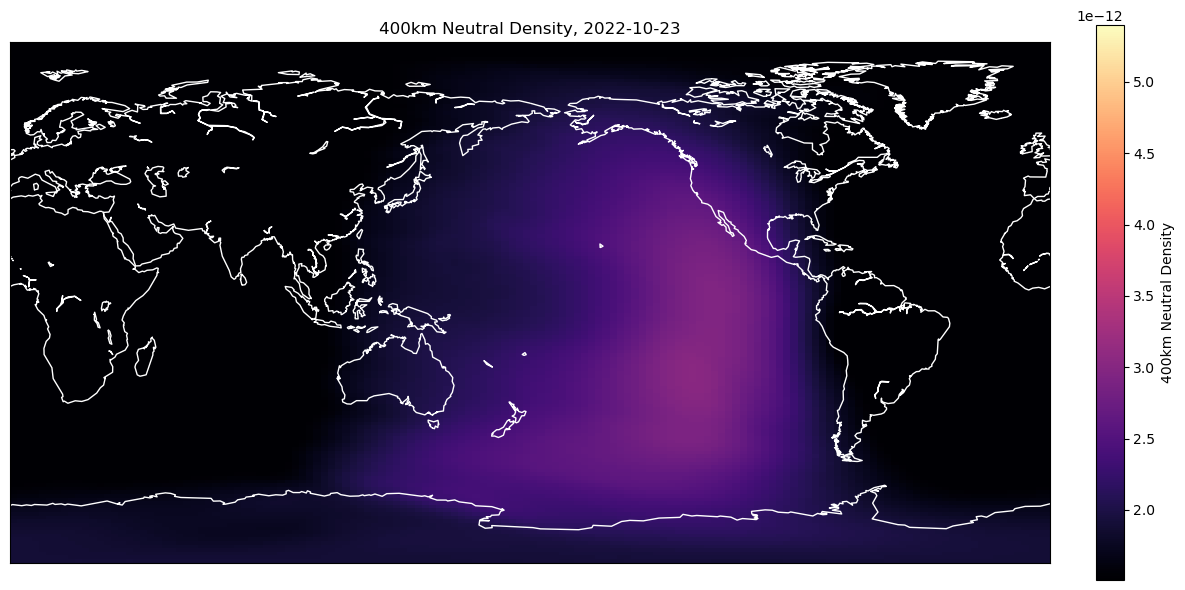

In [17]:
loaded_arrays = np.load('simulation_outputs/20221023_rho_400km_artemis.npz')

x = loaded_arrays['glon'][:,0]
y = loaded_arrays['glat'][0]
z = loaded_arrays['rho']

num_frames = z.shape[0]

fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360,resolution='c', ax=ax)
m.drawcoastlines(color='white')


c = ax.pcolormesh(x, y, z[0].T, shading='auto', cmap='magma')

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('400km Neutral Density')


def init():
    c.set_array(z[0].T.ravel())
    return c,

def update(frame):
    # Updating the array data for pcolormesh
    c.set_array(z[frame].T.ravel())
    return c,

plt.title('400km Neutral Density, 2022-10-23')
anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
anim.save('overlap_plots/artemis_400km_neutral_2022.mp4', writer='ffmpeg', fps=10)
plt.tight_layout()
plt.show()

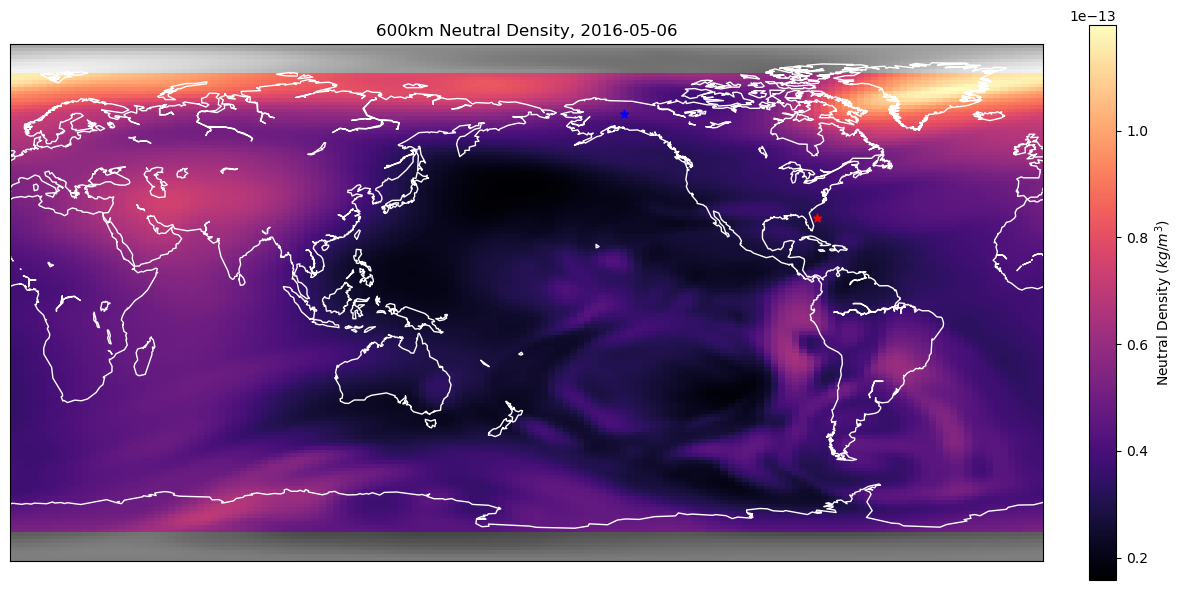

In [26]:
loaded_arrays = np.load('simulation_outputs/20160506_rho_600km_artemis.npz')

x = loaded_arrays['glon'][:,0]
y = loaded_arrays['glat'][0]
z = loaded_arrays['rho'][0][:,:]

fig, ax = plt.subplots(figsize=(12,6))

m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360,resolution='c', ax=ax)
m.drawcoastlines(color='white')

y2 = loaded_arrays['glat'][0][8:136]
z2 = loaded_arrays['rho'][0][:,8:136]

c = ax.pcolormesh(x, y, z.T, shading='auto', cmap='gray')
c = ax.pcolormesh(x, y2, z2.T, shading='auto', cmap='magma')

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label(r'Neutral Density ($kg/m^{3}$)')

plt.scatter(x[112], y[95], c='red', marker='*')
plt.scatter(x[85], y[124], c='blue', marker='*')

plt.title('600km Neutral Density, 2016-05-06')
plt.tight_layout()
#plt.savefig('overlap_plots/artemis_600km_neutral.jpg')
plt.show()

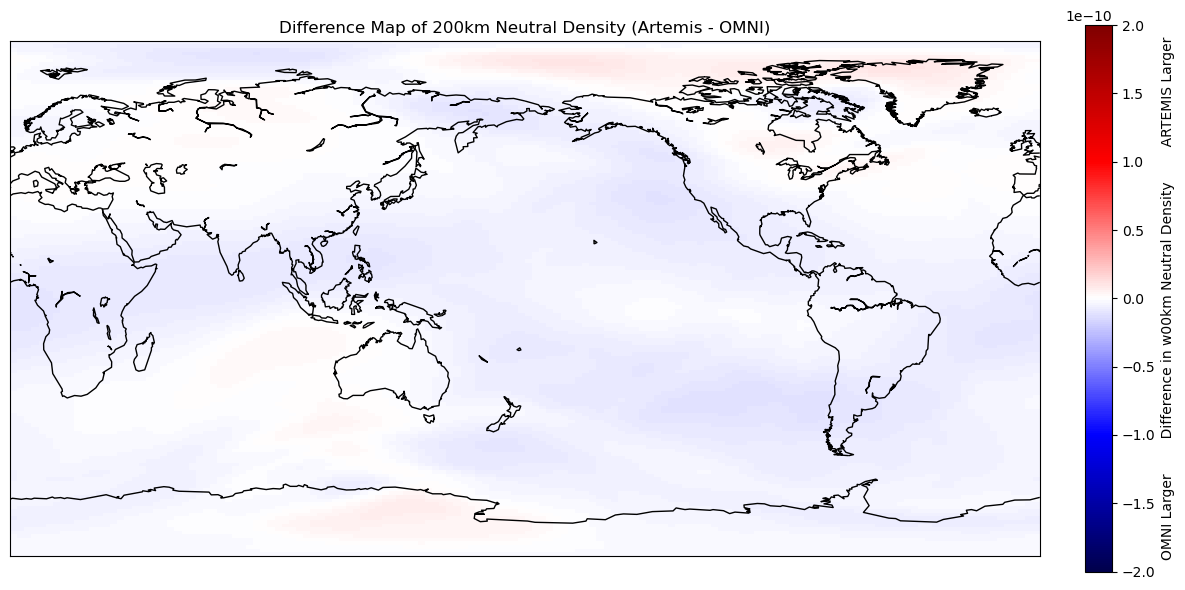

In [3]:
artemis_data = np.load('simulation_outputs/20160506_rho_200km_artemis.npz')
omni_data = np.load('simulation_outputs/20160506_rho_200km_omni.npz')

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']

z_diff = z_artemis - z_omni
num_frames = z_diff.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360, resolution='c', ax=ax)
m.drawcoastlines(color='black')

# Initialize the pcolormesh with grayscale colormap
#c = ax.pcolormesh(x, y, z_diff[0].T, shading='auto', cmap='seismic', vmin=-np.max(np.abs(z_diff))*0.65, vmax=np.max(np.abs(z_diff))*0.65)
c = ax.pcolormesh(x, y, z_diff[0].T, shading='auto', cmap='seismic', vmin=-2E-10, vmax=2E-10)
#ax.text(0.92, 1.05, f'Time = {timestamp}', transform=ax[0].transAxes, ha='left')


cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('OMNI Larger        Difference in w00km Neutral Density        ARTEMIS Larger')

def init():
    c.set_array(z_diff[0].T.ravel())
    return c,

def update(frame):
    # Update the array data for pcolormesh
    c.set_array(z_diff[frame].T.ravel())
    return c,

plt.title('Difference Map of 200km Neutral Density (Artemis - OMNI)')

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Save the animation
anim.save('overlap_plots/difference_map_200km_neutral_2016.mp4', writer='ffmpeg', fps=10)
plt.tight_layout()
plt.show()

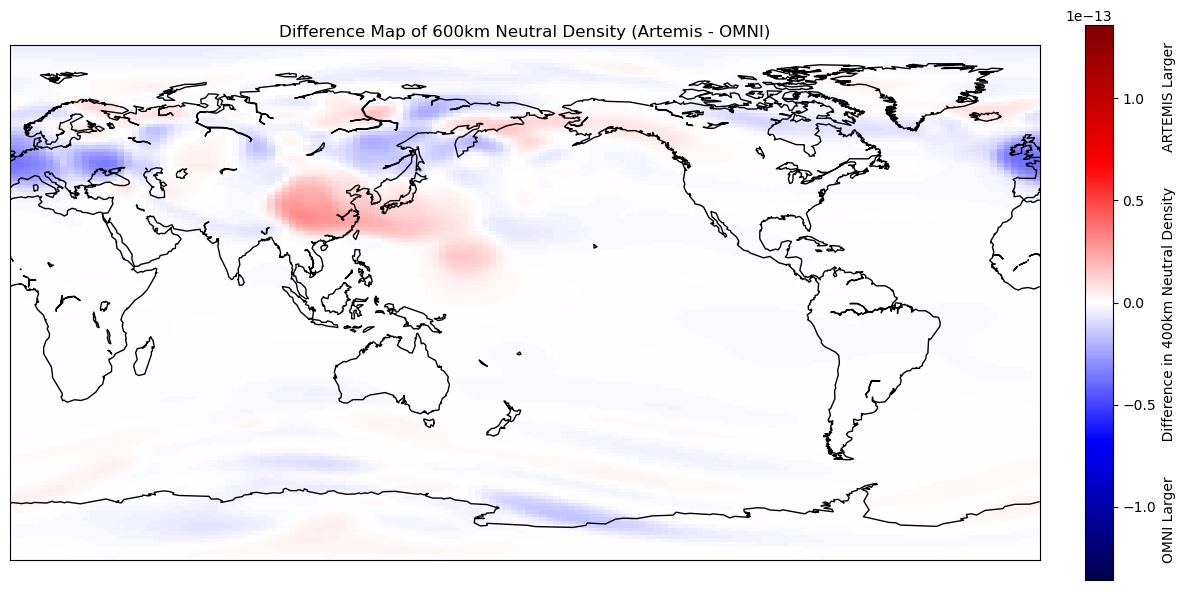

In [3]:
artemis_data = np.load('simulation_outputs/20221023_rho_600km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_600km_omni.npz')

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']

z_diff = z_artemis - z_omni
num_frames = z_diff.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360, resolution='c', ax=ax)
m.drawcoastlines(color='black')

# Initialize the pcolormesh with grayscale colormap
c = ax.pcolormesh(x, y, z_diff[0].T, shading='auto', cmap='seismic', vmin=-np.max(np.abs(z_diff))*0.75, vmax=np.max(np.abs(z_diff))*0.75)

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('OMNI Larger        Difference in 400km Neutral Density        ARTEMIS Larger')

def init():
    c.set_array(z_diff[0].T.ravel())
    return c,

def update(frame):
    # Update the array data for pcolormesh
    c.set_array(z_diff[frame].T.ravel())
    return c,

plt.title('Difference Map of 600km Neutral Density (Artemis - OMNI)')

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Save the animation
anim.save('overlap_plots/difference_map_600km_neutral_2022.mp4', writer='ffmpeg', fps=10)
plt.tight_layout()
plt.show()

In [13]:
artemis_data = np.load('simulation_outputs/20221023_rho_200km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_200km_omni.npz')

n = len(omni_data['ut'])
evenly_spaced_hours = np.linspace(0.083, 24.000, n)
base_date = datetime(datetime.strptime('20121113', "%Y%m%d").year, datetime.strptime('20121113', "%Y%m%d").month, datetime.strptime('20121113', "%Y%m%d").day)  # Base date

timestamps = [base_date + timedelta(hours=hour) for hour in evenly_spaced_hours]

In [23]:
timestamps.index(datetime(2012, 11, 13, 20, 0, 49, 800000))

240

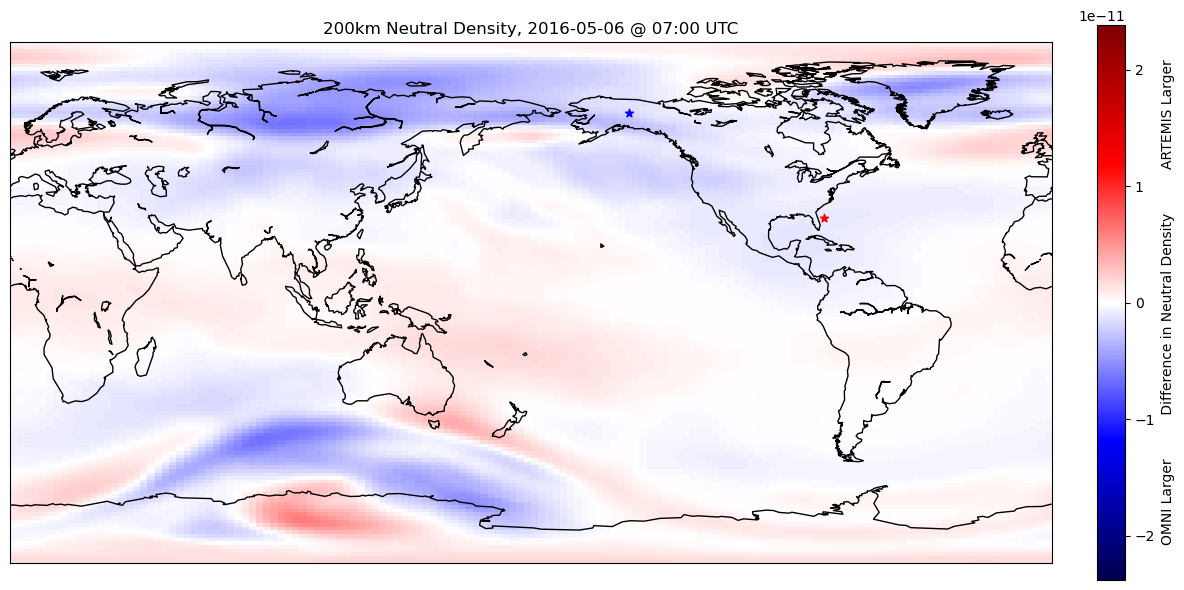

In [7]:
artemis_data = np.load('simulation_outputs/20221023_rho_200km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_200km_omni.npz')

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']

z_diff = z_artemis - z_omni

fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360, resolution='c', ax=ax)
m.drawcoastlines(color='black')
parallels = np.arange(-90, 90, 15)
#m.drawparallels(parallels, labels=[True,False,False,False])
meridians = np.arange(0, 360, 20)
#m.drawmeridians(meridians, labels=[False,False,False,True])

# Initialize the pcolormesh with grayscale colormap
c = ax.pcolormesh(x, y, z_diff[228].T, shading='auto', cmap='seismic', vmin=-np.max(np.abs(z_diff))*0.75, vmax=np.max(np.abs(z_diff))*0.75)

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('OMNI Larger          Difference in Neutral Density          ARTEMIS Larger')

plt.scatter(x[112], y[95], c='red', marker='*')
plt.scatter(x[85], y[124], c='blue', marker='*')


plt.title('200km Neutral Density, 2016-05-06 @ 07:00 UTC')
plt.tight_layout()
plt.savefig('overlap_plots/artemis_200km_diff_2016_0700.jpg')
plt.show()

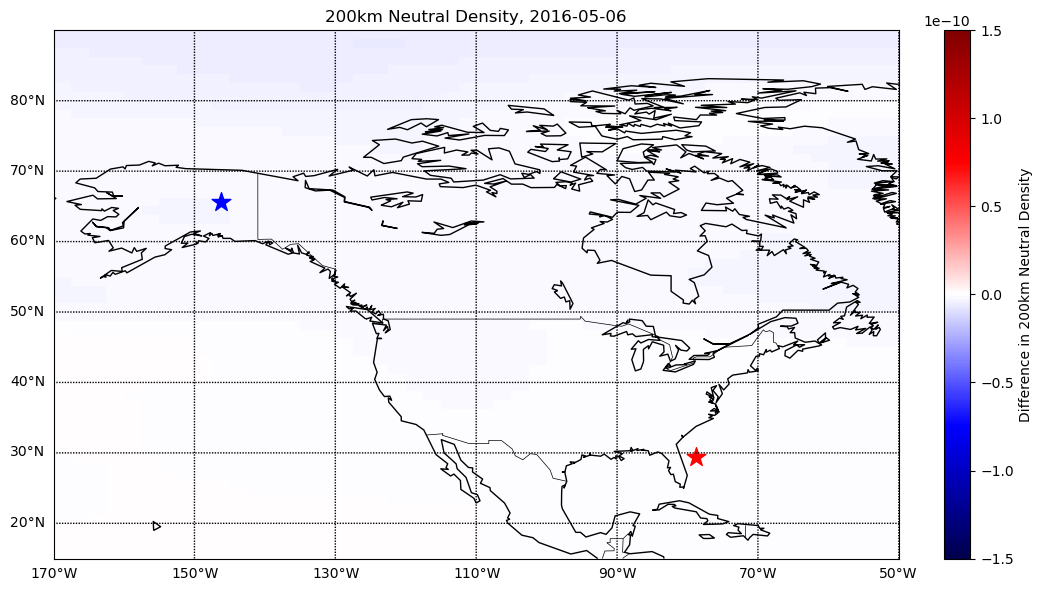

In [37]:
artemis_data = np.load('simulation_outputs/20221023_rho_200km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_200km_omni.npz')

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']

z_diff = z_artemis - z_omni

fig, ax = plt.subplots(figsize=(12, 6))
#m = Basemap(width=8000000,height=6500000, resolution='l', projection='cyl',lat_1=45,lat_2=55,lat_0=50,lon_0=-107)
#m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c', ax=ax)
m = Basemap(projection='cyl', llcrnrlat=15, urcrnrlat=90, llcrnrlon=190, urcrnrlon=310, resolution='c', ax=ax)

m.drawcoastlines(color='black')
m.drawcountries(color='black')
parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

# Initialize the pcolormesh with grayscale colormap
c = ax.pcolormesh(x, y, z_diff[240].T, shading='auto', cmap='seismic', vmin=-1.5E-10, vmax=1.5E-10)

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('Difference in 200km Neutral Density')

plt.scatter(x[112], y[95], c='red', marker='*', s=200)
plt.scatter(x[85], y[124], c='blue', marker='*', s=200)

'''
for i in x:
    plt.axvline(i, alpha=0.2, c='green')
for j in y:
    plt.axhline(j, alpha=0.2, c='green')
'''

plt.title('200km Neutral Density, 2016-05-06')
plt.tight_layout()
#plt.savefig('overlap_plots/artemis_600km_neutral.jpg')
plt.show()

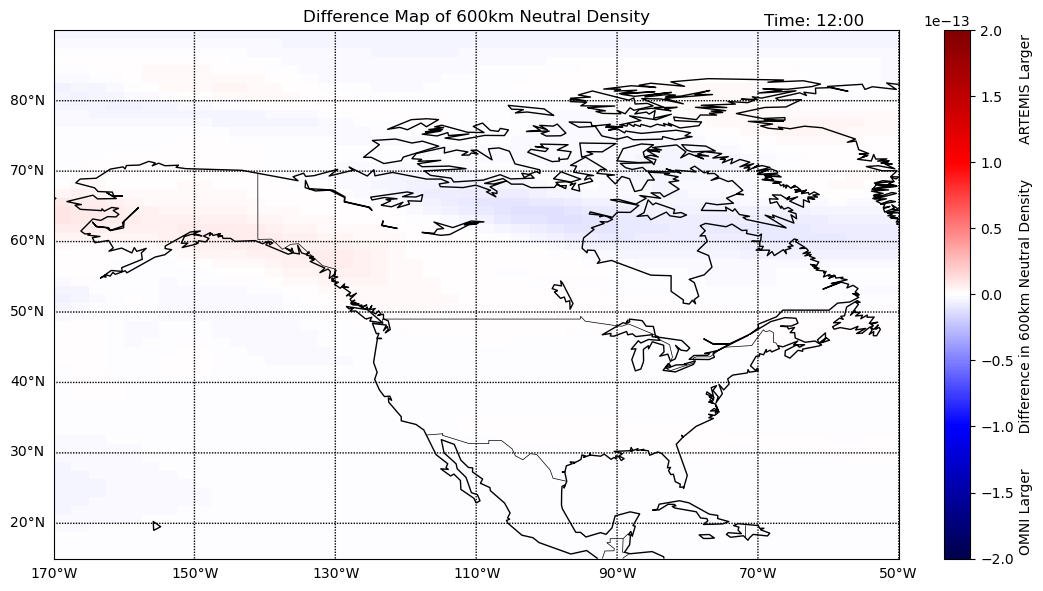

In [50]:
artemis_data = np.load('simulation_outputs/20221023_rho_600km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_600km_omni.npz')

n = len(omni_data['ut'])
evenly_spaced_hours = np.linspace(0.083, 24.000, n)
base_date = datetime(datetime.strptime('20160506', "%Y%m%d").year, datetime.strptime('20160506', "%Y%m%d").month, datetime.strptime('20160506', "%Y%m%d").day)  # Base date

timestamps = [base_date + timedelta(hours=hour+12) for hour in evenly_spaced_hours]
left_timestamp = base_date+timedelta(hours=12)

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']

z_diff = z_artemis - z_omni

fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(projection='cyl', llcrnrlat=15, urcrnrlat=90, llcrnrlon=190, urcrnrlon=310, resolution='c', ax=ax)

m.drawcoastlines(color='black')
m.drawcountries(color='black')
parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

c = ax.pcolormesh(x, y, z_diff[0].T, shading='auto', cmap='seismic', vmin=-2E-13, vmax=2E-13)
timestamp_text = ax.text(0.84, 1.03, '', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='black')

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label('OMNI Larger        Difference in 600km Neutral Density        ARTEMIS Larger')

def init():
    c.set_array(z_diff[0].T.ravel())
    timestamp_text.set_text(f'Time: {timestamps[0].strftime("%H:%M")}')
    return c, timestamp_text

def update(frame):
    # Update the array data for pcolormesh
    c.set_array(z_diff[frame].T.ravel())
    timestamp_text.set_text(f'Time: {timestamps[frame].strftime("%H:%M")}')
    return c, timestamp_text

plt.title('Difference Map of 600km Neutral Density')

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Save the animation
anim.save('overlap_plots/difference_map_600km_neutral_2016_ZOOMED.mp4', writer='ffmpeg', fps=10)
plt.tight_layout()
bbox_inches="tight"
plt.show()

In [51]:
def percDiff(art, omn):
    percent_diff = (np.abs(np.subtract(art, omn)) / (omn)) * 100
    return percent_diff

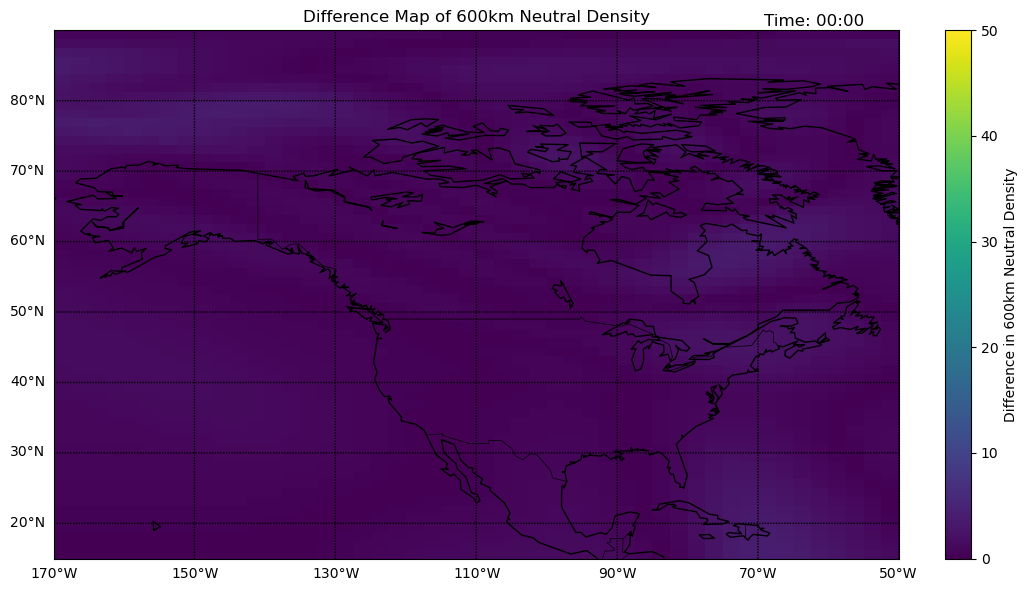

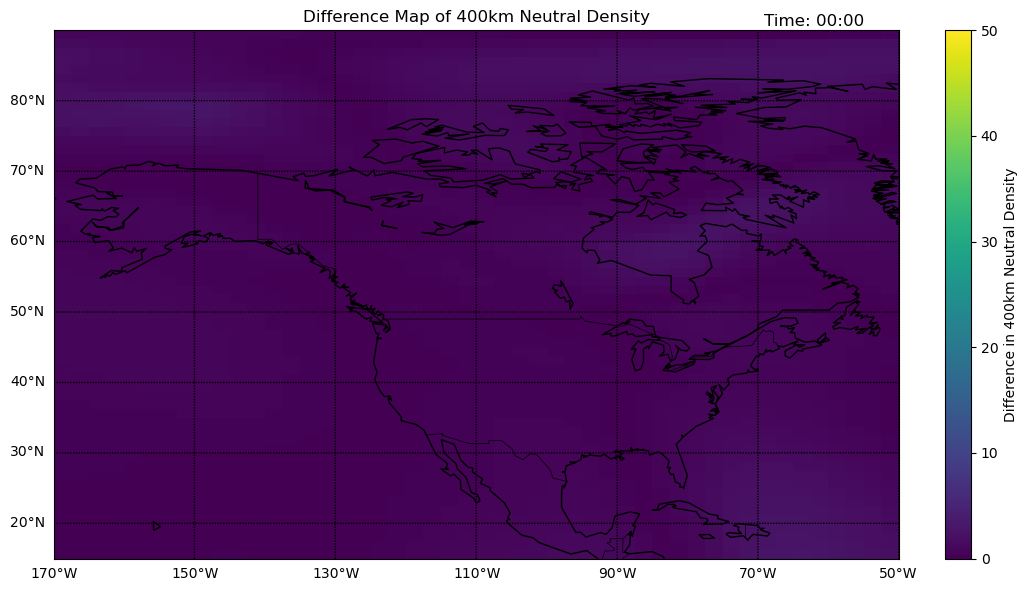

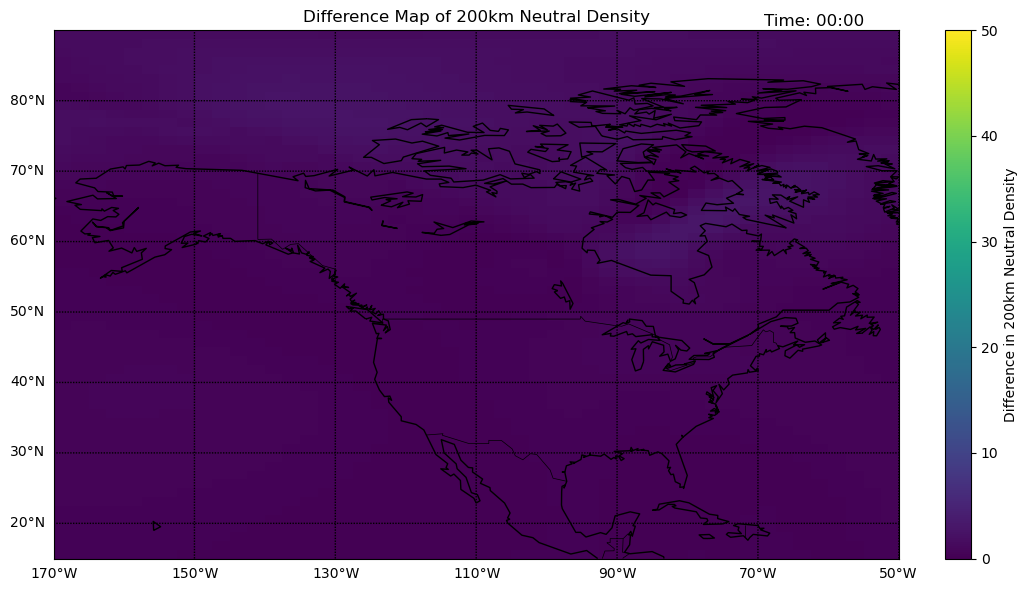

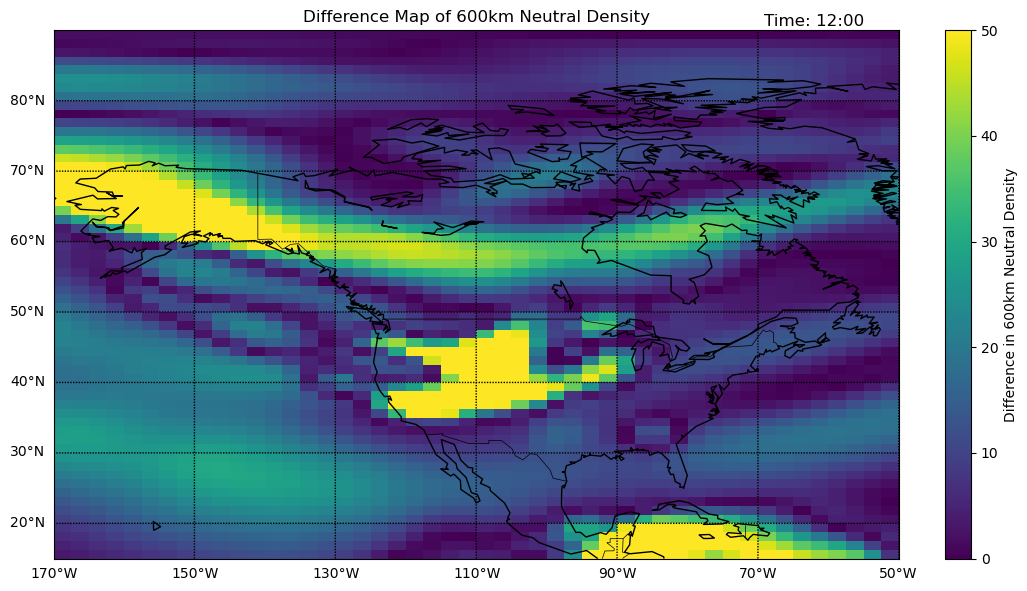

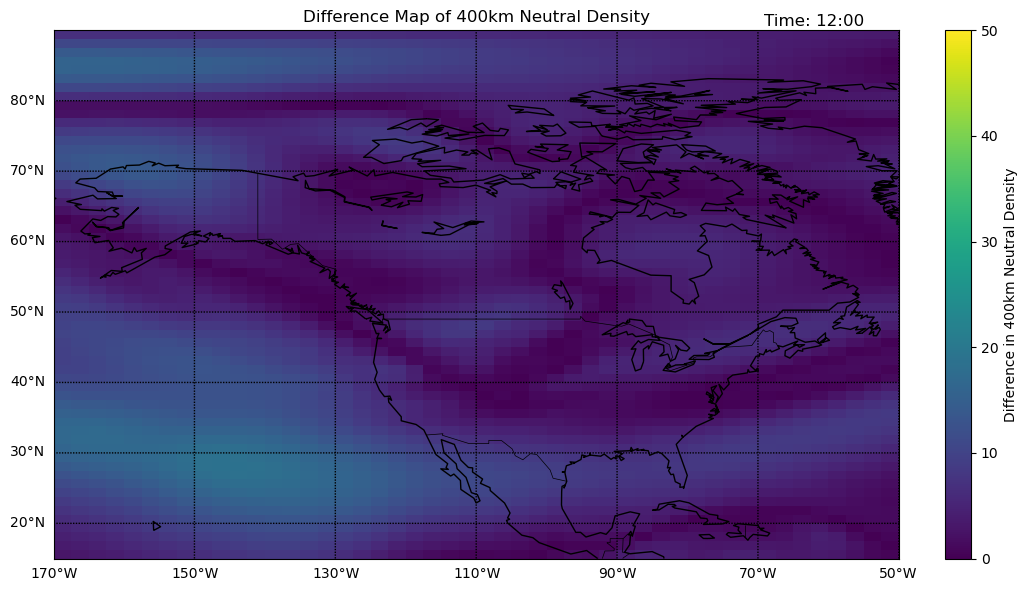

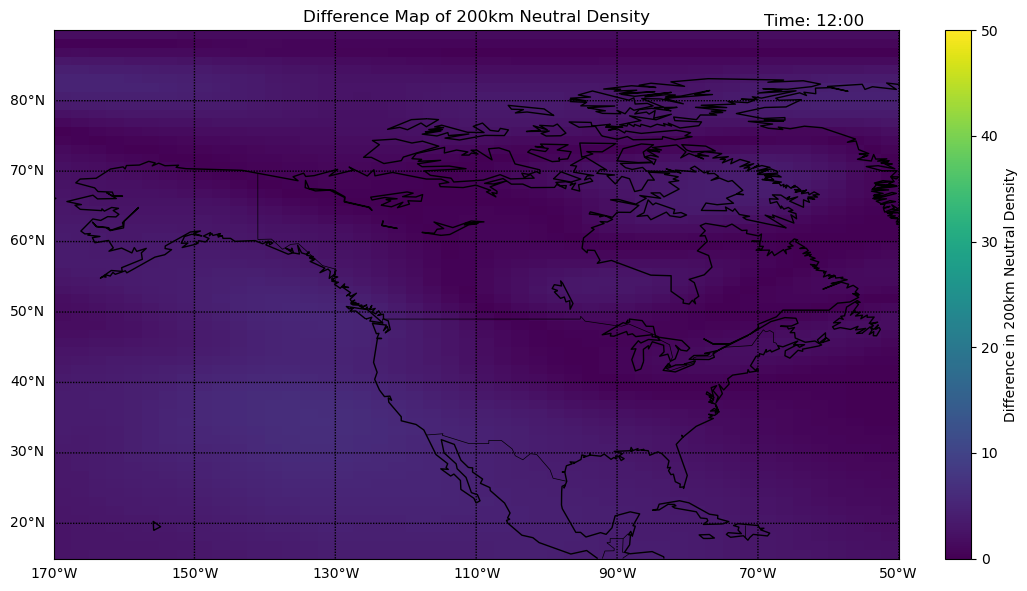

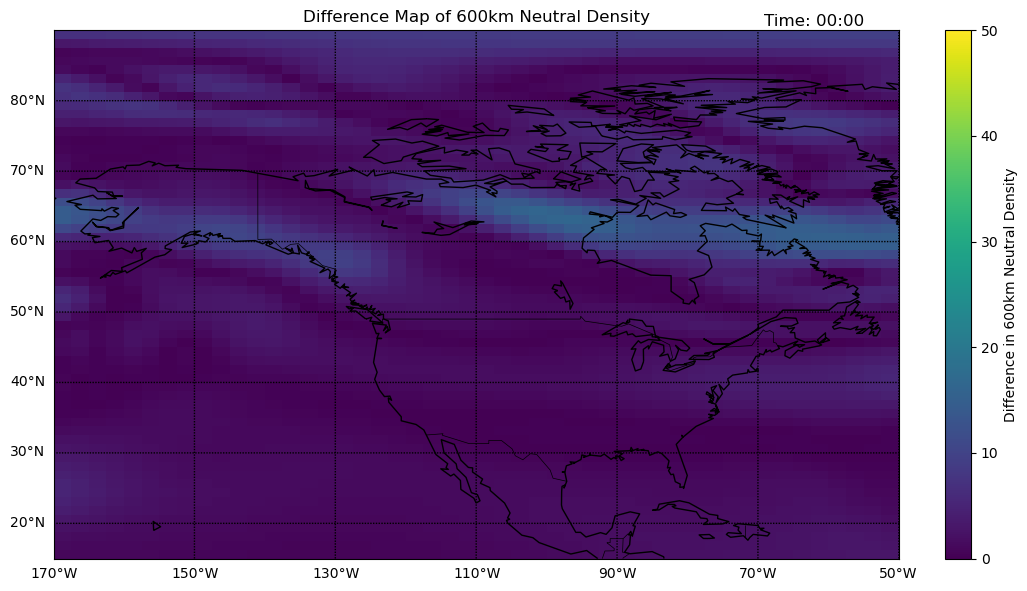

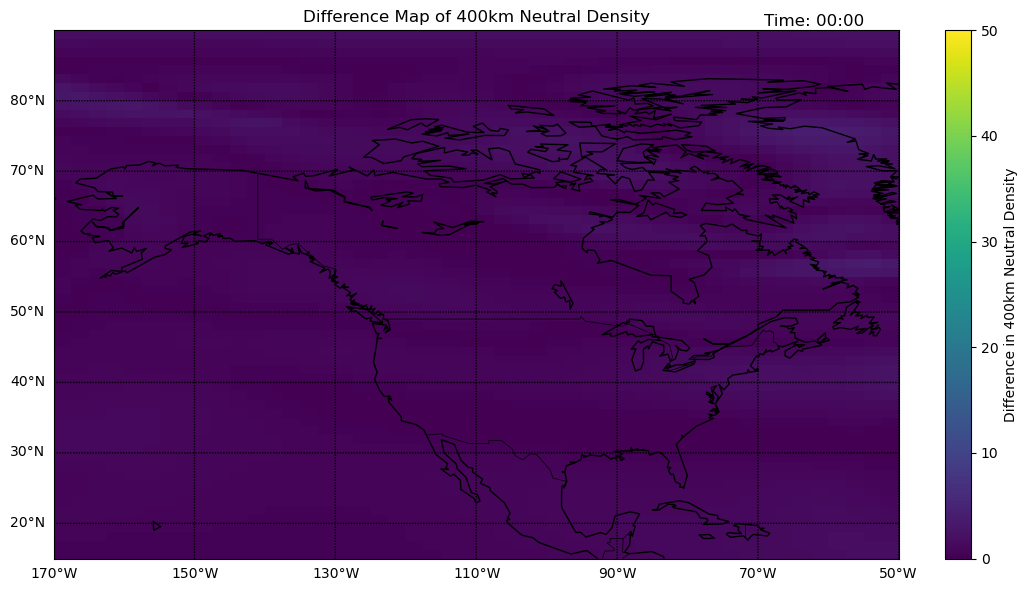

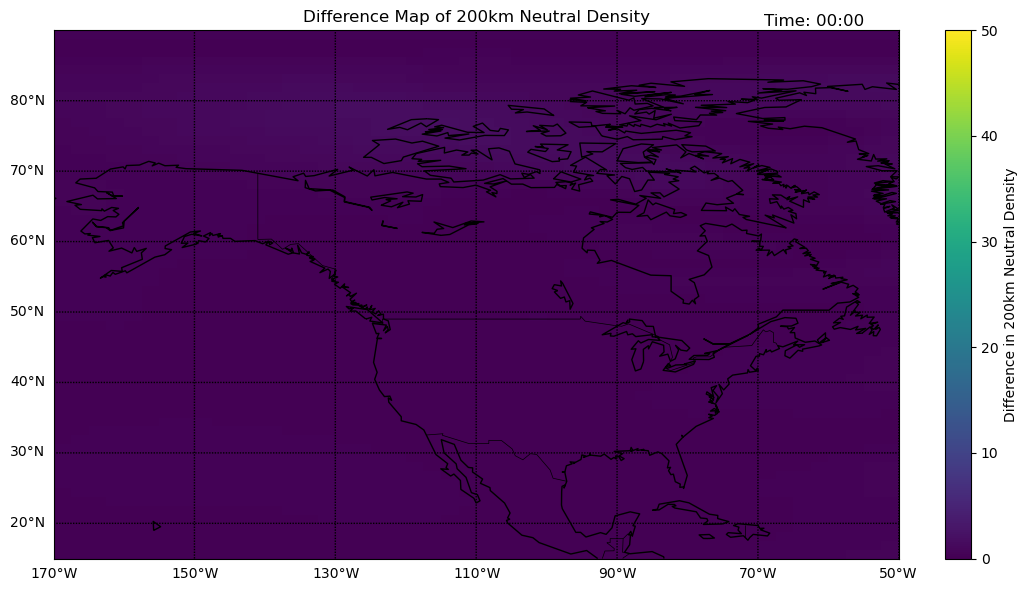

In [76]:
dates = ['20121113', '20160506', '20221023']
alts = ['600', '400', '200']

for d in dates:
    for i, a in enumerate(alts):

        if d == '20121113':
            offset = 0
            d_new = '20121113'
        elif d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        fig, ax = plt.subplots(figsize=(12, 6))
        m = Basemap(projection='cyl', llcrnrlat=15, urcrnrlat=90, llcrnrlon=190, urcrnrlon=310, resolution='c', ax=ax)

        m.drawcoastlines(color='black')
        m.drawcountries(color='black')
        parallels = np.arange(0.,81,10.)
        m.drawparallels(parallels,labels=[True,False,False,False])
        meridians = np.arange(10.,351.,20.)
        m.drawmeridians(meridians,labels=[True,False,False,True])

        artemis_data = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')
        omni_data = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')

        n = len(omni_data['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date

        timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]

        x = artemis_data['glon'][:,0]
        y = artemis_data['glat'][0]
        z_artemis = artemis_data['rho']
        z_omni = omni_data['rho']

        z_diff = percDiff(z_artemis, z_omni)
        num_frames = z_diff.shape[0]

        c = ax.pcolormesh(x, y, z_diff[0].T, shading='auto', cmap='viridis', vmin=0, vmax=50)
        timestamp_text = ax.text(0.84, 1.03, '', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='black')

        cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
        cbar.set_label(f'Difference in {a}km Neutral Density')

        def init():
            c.set_array(z_diff[0].T.ravel())
            timestamp_text.set_text(f'Time: {timestamps[0].strftime("%H:%M")}')
            return c, timestamp_text

        def update(frame):
            # Update the array data for pcolormesh
            c.set_array(z_diff[frame].T.ravel())
            timestamp_text.set_text(f'Time: {timestamps[frame].strftime("%H:%M")}')
            return c, timestamp_text

        plt.title(f'Difference Map of {a}km Neutral Density')

        # Create the animation
        anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

        # Save the animation
        anim.save(f'overlap_plots/maps_new/zoomed/PercDiff_{datetime.strptime(d_new, "%Y%m%d").year}_{a}km_zoom.mp4', writer='ffmpeg', fps=10)
        plt.tight_layout()
        bbox_inches="tight"
        plt.show()

/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_5420/1848649887.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(Theta, R, z_diff[240].T, cmap='viridis', vmin=0, vmax=50)


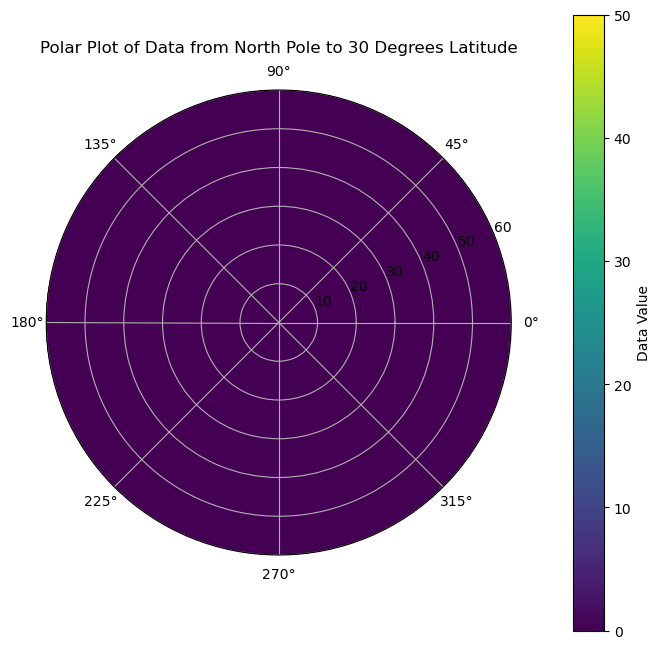

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Example data array (replace this with your actual data)
artemis_data = np.load('simulation_outputs/20221023_rho_600km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_600km_omni.npz')

lons = artemis_data['glon'][:,0]
lats = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']
z_diff = z_artemis - z_omni

# Convert latitude and longitude to polar coordinates
theta = np.deg2rad(lons)  # Convert longitudes to radians for angular position
r = 90 - np.abs(lats)      # Convert latitudes so 90 (North Pole) is center, down to 30

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.set_ylim(0, 60)  # Only show from 90 to 30 degrees latitude

# Create the meshgrid for plotting
R, Theta = np.meshgrid(r, theta)

# Plot the data
c = ax.pcolormesh(Theta, R, z_diff[240].T, cmap='viridis', vmin=0, vmax=50)

# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Data Value')

# Set labels and title
ax.set_title('Polar Plot of Data from North Pole to 30 Degrees Latitude', va='bottom')

plt.show()

In [85]:
def cart2pol(x, y):
    xx, yy = np.meshgrid(x,y)
    rho = np.sqrt(xx**2 + yy**2)
    temp_phi = np.arctan2(yy, xx)
    phi = np.arctan2(yy, xx)
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            if temp_phi[i][j] < 0:
                phi[i][j] = temp_phi[i][j] + 2*np.pi
            else:
                phi[i][j] = temp_phi[i][j]
    return rho, phi


def polar_plot(z):
    fig = plt.figure()

    rho, phi = cart2pol(x,y)
    plt.subplot(projection="polar")

    plt.pcolormesh(phi, rho, z)
    #plt.pcolormesh(th, z, r)

    plt.plot(phi, rho, color='k', ls='none')
    plt.grid()

    plt.show()

/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_5420/1318272150.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(phi, rho, z)


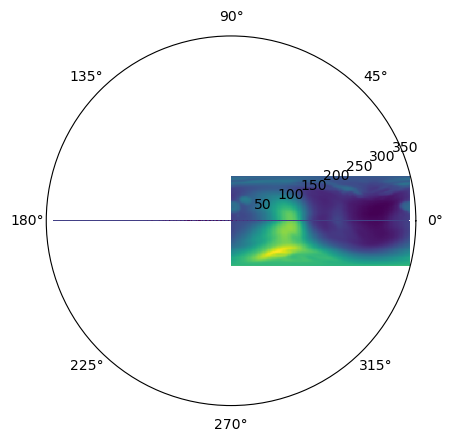

In [96]:
artemis_data = np.load('simulation_outputs/20221023_rho_600km_artemis.npz')
omni_data = np.load('simulation_outputs/20221023_rho_600km_omni.npz')

x = artemis_data['glon'][:,0]
y = artemis_data['glat'][0]
z_artemis = artemis_data['rho']
z_omni = omni_data['rho']
z_diff = z_artemis - z_omni

cart2pol(x, y)
polar_plot(z_artemis[100].T)

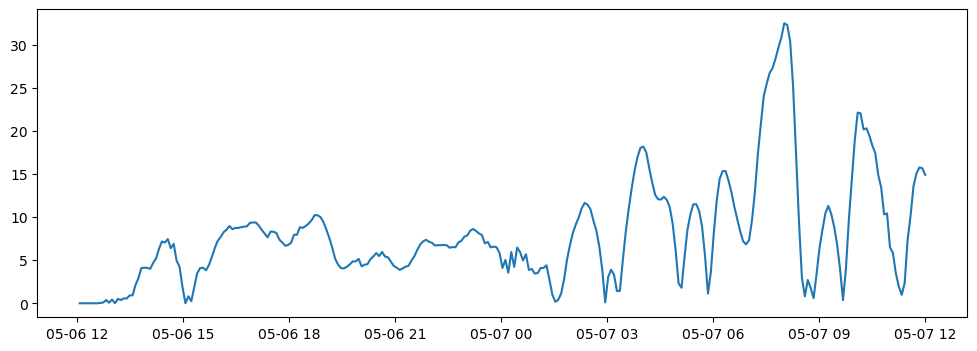

In [67]:
artemis_data = np.load('simulation_outputs/20160506_rho_600km_artemis.npz')
omni_data = np.load('simulation_outputs/20160506_rho_600km_omni.npz')

n = len(omni_data['ut'])
evenly_spaced_hours = np.linspace(0.083, 24.000, n)
base_date = datetime(datetime.strptime('20160506', "%Y%m%d").year, datetime.strptime('20160506', "%Y%m%d").month, datetime.strptime('20160506', "%Y%m%d").day)  # Base date

timestamps = [base_date + timedelta(hours=hour+12) for hour in evenly_spaced_hours]
left_timestamp = base_date+timedelta(hours=12)

fig, ax = plt.subplots(figsize=(12, 4))
ko = []
ka = []
for j in range(len(omni_data['ut'])):
    ko.append(omni_data['rho'][j, 112, 95])
    ka.append(artemis_data['rho'][j, 112, 95])
diff = percDiff(ka, ko)
plt.plot(timestamps, diff)
plt.show()

/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_4372/1847362993.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
  m.plot(xpt, ypt, 'c*', markersize=20, color='red', label='KSC')
/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_4372/1847362993.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
  m.plot(xpt, ypt, 'c*', markersize=20, color='blue',  label='CMO')


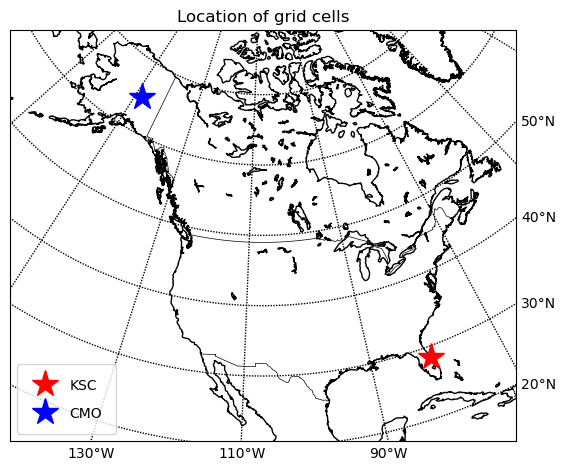

In [43]:
fig, ax = plt.subplots()
m = Basemap(width=8000000,height=6500000, resolution='l', projection='eqdc',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

m.drawcoastlines(color='black')
m.drawcountries(color='black')
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,False,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[False,False,False,True])

xpt, ypt = m(279.349167, 28.524167)
m.plot(xpt, ypt, 'c*', markersize=20, color='red', label='KSC')

xpt, ypt = m(212.1403, 64.8742)
m.plot(xpt, ypt, 'c*', markersize=20, color='blue',  label='CMO')

#xpt, ypt = m(239.47977, 34.751330)
#m.plot(xpt, ypt, 'c*', markersize=20, color='green',  label='VSFB')

plt.legend(loc='lower left', labelspacing=1, borderpad=1)

plt.title('Location of grid cells')
plt.tight_layout()

#plt.savefig('locations.jpg')
plt.show()

In [3]:
omni = np.load(f'data_v3/omni_121113_CPCP.npz')
artemis = np.load(f'data_v3/artemis_121113_CPCP.npz')

In [8]:



    for i in range(len(omni['ut'])):
        df_O = pd.DataFrame(omni['rho'][i], columns=omni['glon'][:,0], index=omni['glat'][0])
        df_A = pd.DataFrame(artemis['rho'][i], columns=artemis['glon'][:,0], index=artemis['glat'][0])

        kennedyOmni.append(df_O[281.25][29.37499999999993])
        kennedyArtemis.append(df_A[281.25][29.37499999999993])

        cmoOmni.append(df_O[213.75][65.62499999999997])
        cmoArtemis.append(df_A[213.75][65.62499999999997])

        vfbOmni.append(df_O[241.25000000000003][35.62499999999997])
        vfbArtemis.append(df_A[241.25000000000003][35.62499999999997])


    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax[0].set_title(f'Thermospheric Neutral Density over Kennedy Space Center, {a} km')

    ax[0].plot(omni['ut'], kennedyArtemis, label='Artemis')
    ax[0].plot(omni['ut'], kennedyOmni, label='Omni')
    ax[0].set(ylabel=r'Neutral Density ($kg/m^{3}$)')
    ax[0].legend(loc='lower right')

    ax[1].set(xlim=(0,24), ylim=(0,15), xlabel='Time on 2012-11-13 (UT)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
    diff = percDiff(kennedyArtemis, kennedyOmni)
    errKSC[a] = diff

    ax[1].plot(omni['ut'], diff, label='Omni')
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.tight_layout()
    plt.savefig(f'overlap_plots/Kennedy_neutral_{a}km.jpg')


    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax[0].set_title(f'Thermospheric Neutral Density over College AK (CMO), {a} km')

    ax[0].plot(omni['ut'], cmoArtemis, label='Artemis')
    ax[0].plot(omni['ut'], cmoOmni, label='Omni')
    ax[0].set(ylabel=r'Neutral Density ($kg/m^{3}$)')
    ax[0].legend(loc='lower right')

    ax[1].set(xlim=(0,24), ylim=(0,15), xlabel='Time on 2012-11-13 (UT)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
    diff = percDiff(cmoArtemis, cmoOmni)
    errCMO[a] = diff

    ax[1].plot(omni['ut'], diff, label='Omni')
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))


    plt.tight_layout()
    plt.savefig(f'overlap_plots/CMO_neutral_{a}km.jpg')

errKSC.to_csv('errKSC.csv', index=False)
errCMO.to_csv('errCMO.csv', index=False)

KeyError: 'rho is not a file in the archive'